<a href="https://colab.research.google.com/github/halimcan/UK-Online-Retail-Company-Analysis/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings("ignore")

import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

'en_US.UTF-8'

In [2]:
# VERININ YÜKLENMESI

#df = pd.read_csv("data.csv")

In [3]:
import pandas as pd

url = 'https://drive.google.com/uc?export=download&id=1maDJcdW0e7c1Au5vWgf4gdkcseWq-v9U'
df = pd.read_csv(url)

print(df.head())

  InvoiceNo StockCode                         Description  Quantity  \
0    536847     21231      SWEETHEART CERAMIC TRINKET BOX        24   
1    536847     22067      CHOC TRUFFLE GOLD TRINKET POT         24   
2    536847     22161    HEART DECORATION RUSTIC HANGING         24   
3    536847     20956  PORCELAIN T-LIGHT HOLDERS ASSORTED        12   
4    536847     22155              STAR DECORATION RUSTIC        48   

                 InvoiceDate  UnitPrice  CustomerID         Country  \
0  2010-12-03 09:31:00+00:00       1.25     17135.0  United Kingdom   
1  2010-12-03 09:31:00+00:00       1.65     17135.0  United Kingdom   
2  2010-12-03 09:31:00+00:00       0.65     17135.0  United Kingdom   
3  2010-12-03 09:31:00+00:00       1.25     17135.0  United Kingdom   
4  2010-12-03 09:31:00+00:00       0.42     17135.0  United Kingdom   

                category InvoiceDateOnly  Year  Month  Day  DayOfWeekNum  \
0          Decor & Gifts      2010-12-03  2010     12    3            

In [4]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,category,InvoiceDateOnly,Year,Month,Day,DayOfWeekNum,IsWeekend,DayOfWeekName,MonthName,Season,IsReturn,TotalPrice
0,536847,21231,SWEETHEART CERAMIC TRINKET BOX,24,2010-12-03 09:31:00+00:00,1.25,17135.0,United Kingdom,Decor & Gifts,2010-12-03,2010,12,3,6,False,Friday,December,Winter,False,30.0
1,536847,22067,CHOC TRUFFLE GOLD TRINKET POT,24,2010-12-03 09:31:00+00:00,1.65,17135.0,United Kingdom,Garden & Outdoor,2010-12-03,2010,12,3,6,False,Friday,December,Winter,False,39.6
2,536847,22161,HEART DECORATION RUSTIC HANGING,24,2010-12-03 09:31:00+00:00,0.65,17135.0,United Kingdom,Decor & Gifts,2010-12-03,2010,12,3,6,False,Friday,December,Winter,False,15.6


In [5]:
# Sütunlarin incelenmesi, veri tipleri
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   InvoiceNo        541909 non-null  object 
 1   StockCode        541909 non-null  object 
 2   Description      540455 non-null  object 
 3   Quantity         541909 non-null  int64  
 4   InvoiceDate      541909 non-null  object 
 5   UnitPrice        541909 non-null  float64
 6   CustomerID       406829 non-null  float64
 7   Country          541909 non-null  object 
 8   category         541909 non-null  object 
 9   InvoiceDateOnly  541909 non-null  object 
 10  Year             541909 non-null  int64  
 11  Month            541909 non-null  int64  
 12  Day              541909 non-null  int64  
 13  DayOfWeekNum     541909 non-null  int64  
 14  IsWeekend        541909 non-null  bool   
 15  DayOfWeekName    541909 non-null  object 
 16  MonthName        541909 non-null  obje

In [6]:
df.isna().mean()*100

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000
category,0.000000
InvoiceDateOnly,0.000000


Primary Key Olusturma

In [7]:
df["CustomerIDInvoiceNo"] = df["CustomerID"].astype(str) + "_" + df["InvoiceNo"].astype(str)


In [8]:
df_cleaned = df.copy() # kopyasini aldim

Eksik verilerin incelenmesi

In [9]:
df_cleaned.isna().mean()*100 # Customer_Id kisimlarinin %25´i eksik. Description da da % 0.27 eksik.

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000
category,0.000000
InvoiceDateOnly,0.000000


## Customer_Id doldurulabilir mi?

In [10]:
# 1️⃣ Eksikleri doldur
df_cleaned["CustomerID"] = df_cleaned["CustomerID"].fillna(0)

# 2️⃣ Sayısal formatta kayıpları tam sayıya çevir
df_cleaned["CustomerID"] = df_cleaned["CustomerID"].astype(int)

# 3️⃣ String formatına çevir
df_cleaned["CustomerID"] = df_cleaned["CustomerID"].astype(str)

# 4️⃣ "0" olanları "Guest/Unknown" ile değiştir
df_cleaned["CustomerID"] = df_cleaned["CustomerID"].replace("0", "Guest/Unknown")

# 5️⃣ (Opsiyonel) kontrol
print(df_cleaned["CustomerID"].unique()[:10])
print(df_cleaned["CustomerID"].dtype)


['17135' '13408' '17396' '12967' '12686' '13370' '16883' '13520' '12841'
 '16905']
object


In [11]:
df_cleaned["CustomerID"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 541909 entries, 0 to 541908
Series name: CustomerID
Non-Null Count   Dtype 
--------------   ----- 
541909 non-null  object
dtypes: object(1)
memory usage: 4.1+ MB


In [12]:
df_cleaned["CustomerID"] = df_cleaned["CustomerID"].replace(
    ["0", "0.0", "nan", "None", ""], "Guest"
)



In [13]:
df_cleaned["CustomerID"].value_counts().head()


,count
CustomerID,
Guest/Unknown,135080
17841,7983
14911,5903
14096,5128
12748,4642


In [14]:




## Descption Doldurulabilir mi diye düsünuyorum stock_kod üzerinden


df_cleaned["Description_filled"] = (
    df_cleaned.groupby("StockCode")["Description"]
              .transform(lambda x: x.ffill().bfill())
)

## Eslesmeyenleri Unknown product olarak doldurdum.
df_cleaned["Description_filled"] = (
    df_cleaned["Description_filled"]
    .fillna("Unknown Product")
)


missing_before = df_cleaned["Description"].isna().sum()
missing_after = df_cleaned["Description_filled"].isna().sum()

print(f"{missing_before - missing_after} Description dolduruldu (%{100 * (missing_before - missing_after) / missing_before:.1f})")




1454 Description dolduruldu (%100.0)


In [15]:
df_cleaned.drop(columns="Description", inplace=True) #  Eksik olan sütunu cikardim.

CustomerID sütunun Guest/Unknown olarak doldurdum ve string veri tipine cevirdim bir sey yapamadim ama Stockcodelarin %92sini doldurdum, kalanini "Unknown Product" olarak atadim.

Hiçbir InvoiceNo, hem CustomerID dolu hem de CustomerID boş satırlarda tekrar etmiyor.
Yani müşterisiz faturalar veride tamamen ayrı. Müşterisiz kayıtları RFM, CLV gibi müşteri bazlı analizlerde dahil etmemeliyiz.

In [16]:
df_cleaned.isna().mean()*100


,0
InvoiceNo,0.0
StockCode,0.0
Quantity,0.0
InvoiceDate,0.0
UnitPrice,0.0
CustomerID,0.0
Country,0.0
category,0.0
InvoiceDateOnly,0.0
Year,0.0


Iade Sütununu Inceleme

In [17]:
# Iade Sütununu Tekrar Düzenleme


#  Kesin iadeler (InvoiceNo 'C' ile başlıyorsa)
df_cleaned["IsReturn"] = df_cleaned["InvoiceNo"].astype(str).str.startswith("C")

# Şüpheli iadeler (C ile başlamıyor ama Quantity < 0)
df_cleaned["IsSuspiciousReturn"] = (
    (~df_cleaned["InvoiceNo"].astype(str).str.startswith("C")) &
    (df_cleaned["Quantity"] < 0)
)

# Tipleri boolean yap
df_cleaned["IsReturn"] = df_cleaned["IsReturn"].astype(bool)
df_cleaned["IsSuspiciousReturn"] = df_cleaned["IsSuspiciousReturn"].astype(bool)

# Kontrol
print("Kesin iadeler (IsReturn):")
print(df_cleaned["IsReturn"].value_counts())

print("\nŞüpheli iadeler (IsSuspiciousReturn):")
print(df_cleaned["IsSuspiciousReturn"].value_counts())

# Örnek kontrol — şüpheli iadelerden birkaç satır
df_cleaned.loc[df_cleaned["IsSuspiciousReturn"], ["InvoiceNo", "Quantity", "Description_filled", "UnitPrice"]].head()


Kesin iadeler (IsReturn):
IsReturn
False    532621
True       9288
Name: count, dtype: int64

Şüpheli iadeler (IsSuspiciousReturn):
IsSuspiciousReturn
False    540573
True       1336
Name: count, dtype: int64


,InvoiceNo,Quantity,Description_filled,UnitPrice
1958,536996,-20,CARD DOLLY GIRL,0.0
1959,536997,-20,PENNY FARTHING BIRTHDAY CARD,0.0
1960,536998,-6,CREAM SWEETHEART WALL CABINET,0.0
1962,537000,-22,SCALLOP SHELL SOAP DISH,0.0
1963,537001,-6,Unknown Product,0.0


In [18]:
import pandas as pd

# Toplam satış ve iadeler
summary = pd.DataFrame({
    "Toplam İşlem Sayısı": [
        len(df_cleaned),
        df_cleaned["IsReturn"].sum(),
        df_cleaned["IsSuspiciousReturn"].sum()
    ],
    "Toplam Gelir (₺)": [
        df_cleaned["TotalPrice"].sum(),
        df_cleaned.loc[df_cleaned["IsReturn"], "TotalPrice"].sum(),
        df_cleaned.loc[df_cleaned["IsSuspiciousReturn"], "TotalPrice"].sum()
    ]
}, index=["Tümü", "Kesin İadeler", "Şüpheli İadeler"])

#  Oran hesaplamaları
summary["İade Oranı (%)"] = [
    0,
    (summary.loc["Kesin İadeler", "Toplam İşlem Sayısı"] / summary.loc["Tümü", "Toplam İşlem Sayısı"]) * 100,
    (summary.loc["Şüpheli İadeler", "Toplam İşlem Sayısı"] / summary.loc["Tümü", "Toplam İşlem Sayısı"]) * 100
]

summary["Gelir Etkisi (%)"] = [
    0,
    (summary.loc["Kesin İadeler", "Toplam Gelir (₺)"] / summary.loc["Tümü", "Toplam Gelir (₺)"]) * 100,
    (summary.loc["Şüpheli İadeler", "Toplam Gelir (₺)"] / summary.loc["Tümü", "Toplam Gelir (₺)"]) * 100
]

#  Görsel olarak biraz daha okunaklı hale getirelim
summary["Toplam Gelir (₺)"] = summary["Toplam Gelir (₺)"].apply(lambda x: f"{x:,.0f}")

print("💰 İadelerin Gelire Etkisi Özeti")
display(summary)


💰 İadelerin Gelire Etkisi Özeti


,Toplam İşlem Sayısı,Toplam Gelir (₺),İade Oranı (%),Gelir Etkisi (%)
Tümü,541909,"9,747,748",0.000000,0.000000
Kesin İadeler,9288,"-896,812",1.713941,-9.200202
Şüpheli İadeler,1336,0,0.246536,0.000000


In [19]:
df_cleaned.head(3)


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,category,InvoiceDateOnly,Year,...,DayOfWeekNum,IsWeekend,DayOfWeekName,MonthName,Season,IsReturn,TotalPrice,CustomerIDInvoiceNo,Description_filled,IsSuspiciousReturn
0,536847,21231,24,2010-12-03 09:31:00+00:00,1.25,17135,United Kingdom,Decor & Gifts,2010-12-03,2010,...,6,False,Friday,December,Winter,False,30.0,17135.0_536847,SWEETHEART CERAMIC TRINKET BOX,False
1,536847,22067,24,2010-12-03 09:31:00+00:00,1.65,17135,United Kingdom,Garden & Outdoor,2010-12-03,2010,...,6,False,Friday,December,Winter,False,39.6,17135.0_536847,CHOC TRUFFLE GOLD TRINKET POT,False
2,536847,22161,24,2010-12-03 09:31:00+00:00,0.65,17135,United Kingdom,Decor & Gifts,2010-12-03,2010,...,6,False,Friday,December,Winter,False,15.6,17135.0_536847,HEART DECORATION RUSTIC HANGING,False


Is_Holiday Degiskeninin eklenmesi

In [20]:
import pandas as pd
import holidays

def add_country_specific_holidays(dataframe, country_col='Country', date_col='InvoiceDateOnly'):
    """
    DataFrame'e ülke bazlı tatil kontrolü ekler.

    Parameters:
    dataframe: pandas DataFrame
    country_col: str - Ülke sütununun adı (varsayılan: 'Country')
    date_col: str - Tarih sütununun adı (varsayılan: 'InvoiceDateOnly')

    Returns:
    pandas DataFrame - 'is_holiday' sütunu eklenmiş
    """

    # DataFrame'i kopyala (orijinali değiştirmemek için)
    df_result = dataframe.copy()

    # Sütun kontrolü
    if country_col not in df_result.columns:
        raise ValueError(f"'{country_col}' sütunu bulunamadı. Mevcut sütunlar: {df_result.columns.tolist()}")
    if date_col not in df_result.columns:
        raise ValueError(f"'{date_col}' sütunu bulunamadı. Mevcut sütunlar: {df_result.columns.tolist()}")

    print(f"✓ Sütunlar bulundu: {country_col}, {date_col}")
    print(f"✓ Toplam kayıt sayısı: {len(df_result)}")

    # Ülke kodları eşleştirmesi (holidays kütüphanesi için)
    country_mapping = {
        'United Kingdom': 'GB',
        'France': 'FR',
        'Switzerland': 'CH',
        'Germany': 'DE',
        'EIRE': 'IE',
        'Spain': 'ES',
        'Poland': 'PL',
        'Portugal': 'PT',
        'Italy': 'IT',
        'Belgium': 'BE',
        'Austria': 'AT',
        'Sweden': 'SE',
        'Australia': 'AU',
        'Netherlands': 'NL',
        'Finland': 'FI',
        'Japan': 'JP',
        'Greece': 'GR',
        'Israel': 'IL',
        'Brazil': 'BR',
        'Hong Kong': 'HK',
        'Cyprus': 'CY',
        'Channel Islands': 'GB',
        'Canada': 'CA',
        'Norway': 'NO',
        'Denmark': 'DK',
        'Czech Republic': 'CZ',
        'Singapore': 'SG',
        'USA': 'US',
        'United Arab Emirates': 'AE',
        'Bahrain': 'BH',
        'Malta': 'MT',
        'Iceland': 'IS',
        'Lithuania': 'LT',
        'Lebanon': 'LB',
        'Saudi Arabia': 'SA',
        'RSA': 'ZA',
    }

    # Tarihi datetime formatına çevir (eğer değilse)
    if not pd.api.types.is_datetime64_any_dtype(df_result[date_col]):
        print(f"⚠ Tarih sütunu datetime formatına çevriliyor...")
        df_result[date_col] = pd.to_datetime(df_result[date_col])

    print(f"✓ Tarih formatı: {df_result[date_col].dtype}")

    # Benzersiz ülkeler ve yıllar (NaN değerleri filtrele)
    unique_countries = df_result[country_col].dropna().unique()
    years = df_result[date_col].dt.year.unique()

    print(f"✓ Benzersiz ülke sayısı: {len(unique_countries)}")
    print(f"✓ Yıl aralığı: {years.min()} - {years.max()}")

    # Her ülke için tatil sözlüğü oluştur
    country_holidays_dict = {}
    print(f"\n🔍 Tatil bilgileri yükleniyor...")

    for country in unique_countries:
        country_code = country_mapping.get(country)
        if country_code:
            try:
                country_holidays_dict[country] = holidays.country_holidays(
                    country_code,
                    years=list(years)
                )
                holiday_count = len([d for d in country_holidays_dict[country] if d.year in years])
                print(f"  ✓ {country} ({country_code}): {holiday_count} tatil günü")
            except Exception as e:
                print(f"  ✗ {country}: Tatil bilgisi yüklenemedi - {e}")
                country_holidays_dict[country] = None
        else:
            if country not in ['Unspecified', 'European Community']:
                print(f"  ⚠ {country}: Ülke kodu bulunamadı")
            country_holidays_dict[country] = None

    # Tatil kontrolü fonksiyonu
    def check_holiday(row):
        country = row[country_col]

        if pd.isna(country) or country in ['Unspecified', 'European Community']:
            return False

        date = row[date_col].date()

        if country in country_holidays_dict and country_holidays_dict[country]:
            return date in country_holidays_dict[country]
        return False

    # Tatil sütunu ekle
    print(f"\n⏳ Tatil kontrolü yapılıyor...")
    df_result['is_holiday'] = df_result.apply(check_holiday, axis=1)

    holiday_count = df_result['is_holiday'].sum()
    print(f"✅ Tamamlandı! {holiday_count} tatil günü bulundu ({holiday_count/len(df_result)*100:.2f}%)")

    return df_result


# KULLANIM
df_cleaned = add_country_specific_holidays(df_cleaned)

# Sonuçları kontrol et
print(f"\nToplam kayıt sayısı: {len(df_cleaned)}")
print(f"Tatil günü olan kayıt sayısı: {df_cleaned['is_holiday'].sum()}")
print(f"Tatil oranı: {df_cleaned['is_holiday'].mean():.2%}")

# Ülke bazında tatil analizi
print("\n=== Ülke Bazında Tatil İstatistikleri ===")
holiday_stats = df_cleaned.groupby('Country')['is_holiday'].agg([
    ('Toplam_Kayıt', 'count'),
    ('Tatil_Sayısı', 'sum'),
    ('Tatil_Oranı', lambda x: f"{x.mean():.2%}")
])
print(holiday_stats.sort_values('Tatil_Sayısı', ascending=False))

# Tatil olan kayıtlara bakmak için:
# holiday_records = df_cleaned[df_cleaned['is_holiday'] == True]
# print(holiday_records[['Country', 'InvoiceDateOnly', 'is_holiday']].head(20))

✓ Sütunlar bulundu: Country, InvoiceDateOnly
✓ Toplam kayıt sayısı: 541909
⚠ Tarih sütunu datetime formatına çevriliyor...
✓ Tarih formatı: datetime64[ns]
✓ Benzersiz ülke sayısı: 38
✓ Yıl aralığı: 2010 - 2011

🔍 Tatil bilgileri yükleniyor...
  ✓ United Kingdom (GB): 17 tatil günü
  ✓ France (FR): 22 tatil günü
  ✓ Switzerland (CH): 8 tatil günü
  ✓ Germany (DE): 18 tatil günü
  ✓ EIRE (IE): 19 tatil günü
  ✓ Spain (ES): 17 tatil günü
  ✓ Poland (PL): 25 tatil günü
  ✓ Portugal (PT): 26 tatil günü
  ✓ Italy (IT): 24 tatil günü
  ✓ Belgium (BE): 24 tatil günü
  ✓ Austria (AT): 26 tatil günü
  ✓ Sweden (SE): 128 tatil günü
  ✓ Australia (AU): 13 tatil günü
  ✓ Netherlands (NL): 21 tatil günü
  ✓ Finland (FI): 30 tatil günü
  ✓ Japan (JP): 31 tatil günü
  ✓ Greece (GR): 24 tatil günü
  ✓ Israel (IL): 18 tatil günü
  ✓ Brazil (BR): 18 tatil günü
  ✓ Hong Kong (HK): 26 tatil günü
  ✓ Cyprus (CY): 30 tatil günü
  ✓ Channel Islands (GB): 17 tatil günü
  ✓ Canada (CA): 13 tatil günü
  ✓ Norway

In [21]:
# Önce basit bir test yapalım
print("Test 1: Sütun isimleri")
print(df_cleaned.columns.tolist())

print("\nTest 2: Tarih formatı")
print(df_cleaned['InvoiceDateOnly'].dtype)

print("\nTest 3: İlk birkaç kayıt")
print(df_cleaned[['Country', 'InvoiceDateOnly']].head())

# Sonra fonksiyonu çalıştır
df_cleaned = add_country_specific_holidays(df_cleaned)

Test 1: Sütun isimleri
['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'category', 'InvoiceDateOnly', 'Year', 'Month', 'Day', 'DayOfWeekNum', 'IsWeekend', 'DayOfWeekName', 'MonthName', 'Season', 'IsReturn', 'TotalPrice', 'CustomerIDInvoiceNo', 'Description_filled', 'IsSuspiciousReturn', 'is_holiday']

Test 2: Tarih formatı
datetime64[ns]

Test 3: İlk birkaç kayıt
          Country InvoiceDateOnly
0  United Kingdom      2010-12-03
1  United Kingdom      2010-12-03
2  United Kingdom      2010-12-03
3  United Kingdom      2010-12-03
4  United Kingdom      2010-12-03
✓ Sütunlar bulundu: Country, InvoiceDateOnly
✓ Toplam kayıt sayısı: 541909
✓ Tarih formatı: datetime64[ns]
✓ Benzersiz ülke sayısı: 38
✓ Yıl aralığı: 2010 - 2011

🔍 Tatil bilgileri yükleniyor...
  ✓ United Kingdom (GB): 17 tatil günü
  ✓ France (FR): 22 tatil günü
  ✓ Switzerland (CH): 8 tatil günü
  ✓ Germany (DE): 18 tatil günü
  ✓ EIRE (IE): 19 tatil günü
  ✓ Spain (ES): 17 tatil 

Is_Export Degiskeninin Eklenmesi

In [22]:
import pandas as pd
import holidays

def add_country_specific_holidays(dataframe, country_col='Country', date_col='InvoiceDateOnly'):
    """
    DataFrame'e ülke bazlı tatil kontrolü ekler.

    Parameters:
    dataframe: pandas DataFrame
    country_col: str - Ülke sütununun adı (varsayılan: 'Country')
    date_col: str - Tarih sütununun adı (varsayılan: 'InvoiceDateOnly')

    Returns:
    pandas DataFrame - 'is_holiday' sütunu eklenmiş
    """

    # Sütun kontrolü
    if country_col not in dataframe.columns:
        raise ValueError(f"'{country_col}' sütunu bulunamadı. Mevcut sütunlar: {dataframe.columns.tolist()}")
    if date_col not in dataframe.columns:
        raise ValueError(f"'{date_col}' sütunu bulunamadı. Mevcut sütunlar: {dataframe.columns.tolist()}")

    print(f"✓ Sütunlar bulundu: {country_col}, {date_col}")
    print(f"✓ Toplam kayıt sayısı: {len(dataframe)}")

    # Ülke kodları eşleştirmesi (holidays kütüphanesi için)
    country_mapping = {
        'United Kingdom': 'GB',
        'France': 'FR',
        'Switzerland': 'CH',
        'Germany': 'DE',
        'EIRE': 'IE',  # İrlanda
        'Spain': 'ES',
        'Poland': 'PL',
        'Portugal': 'PT',
        'Italy': 'IT',
        'Belgium': 'BE',
        'Austria': 'AT',
        'Sweden': 'SE',
        'Australia': 'AU',
        'Netherlands': 'NL',
        'Finland': 'FI',
        'Japan': 'JP',
        'Greece': 'GR',
        'Israel': 'IL',
        'Brazil': 'BR',
        'Hong Kong': 'HK',
        'Cyprus': 'CY',
        'Channel Islands': 'GB',  # Channel Islands, UK tatillerini kullanır
        'Canada': 'CA',
        'Norway': 'NO',
        'Denmark': 'DK',
        'Czech Republic': 'CZ',
        'Singapore': 'SG',
        'USA': 'US',
        'United Arab Emirates': 'AE',
        'Bahrain': 'BH',
        'Malta': 'MT',
        'Iceland': 'IS',
        'Lithuania': 'LT',
        'Lebanon': 'LB',
        'Saudi Arabia': 'SA',
        'RSA': 'ZA',  # Republic of South Africa (Güney Afrika)
        # 'Unspecified' ve 'European Community' için kod yok (tatil kontrolü yapılmaz)
    }

    # Tarihi datetime formatına çevir (eğer değilse)
    if not pd.api.types.is_datetime64_any_dtype(dataframe[date_col]):
        print(f"⚠ Tarih sütunu datetime formatına çevriliyor...")
        dataframe[date_col] = pd.to_datetime(dataframe[date_col])

    print(f"✓ Tarih formatı: {dataframe[date_col].dtype}")

    # Benzersiz ülkeler ve yıllar (NaN değerleri filtrele)
    unique_countries = dataframe[country_col].dropna().unique()
    years = dataframe[date_col].dt.year.unique()

    print(f"✓ Benzersiz ülke sayısı: {len(unique_countries)}")
    print(f"✓ Yıl aralığı: {years.min()} - {years.max()}")

    # Her ülke için tatil sözlüğü oluştur
    country_holidays = {}
    print(f"\n🔍 Tatil bilgileri yükleniyor...")

    for country in unique_countries:
        country_code = country_mapping.get(country)
        if country_code:
            try:
                # Tüm yıllar için tatilleri al
                country_holidays[country] = holidays.country_holidays(
                    country_code,
                    years=list(years)
                )
                holiday_count = len([d for d in country_holidays[country] if d.year in years])
                print(f"  ✓ {country} ({country_code}): {holiday_count} tatil günü")
            except Exception as e:
                print(f"  ✗ {country}: Tatil bilgisi yüklenemedi - {e}")
                country_holidays[country] = None
        else:
            if country not in ['Unspecified', 'European Community']:
                print(f"  ⚠ {country}: Ülke kodu bulunamadı")
            country_holidays[country] = None

    # Tatil kontrolü fonksiyonu
    def check_holiday(row):
        country = row[country_col]

        # NaN, Unspecified veya European Community kontrolü
        if pd.isna(country) or country in ['Unspecified', 'European Community']:
            return False

        date = row[date_col].date()

        if country in country_holidays and country_holidays[country]:
            return date in country_holidays[country]
        return False

    # Tatil sütunu ekle
    print(f"\n⏳ Tatil kontrolü yapılıyor...")
    dataframe['is_holiday'] = dataframe.apply(check_holiday, axis=1)

    holiday_count = dataframe['is_holiday'].sum()
    print(f"✅ Tamamlandı! {holiday_count} tatil günü bulundu ({holiday_count/len(dataframe)*100:.2f}%)")

    return dataframe


# KULLANIM - df_cleaned için:
# Tatil sütununu ekle
df_cleaned = add_country_specific_holidays(df_cleaned)

# Sonuçları kontrol et
print(f"\nToplam kayıt sayısı: {len(df_cleaned)}")
print(f"Tatil günü olan kayıt sayısı: {df_cleaned['is_holiday'].sum()}")
print(f"Tatil oranı: {df_cleaned['is_holiday'].mean():.2%}")

# Ülke bazında tatil analizi
print("\n=== Ülke Bazında Tatil İstatistikleri ===")
holiday_stats = df_cleaned.groupby('Country')['is_holiday'].agg([
    ('Toplam_Kayıt', 'count'),
    ('Tatil_Sayısı', 'sum'),
    ('Tatil_Oranı', lambda x: f"{x.mean():.2%}")
])
print(holiday_stats.sort_values('Tatil_Sayısı', ascending=False))

# Tatil olan kayıtlara bakmak için:
# holiday_records = df_cleaned[df_cleaned['is_holiday'] == True]
# print(holiday_records[['Country', 'InvoiceDateOnly', 'is_holiday']].head(20))

✓ Sütunlar bulundu: Country, InvoiceDateOnly
✓ Toplam kayıt sayısı: 541909
✓ Tarih formatı: datetime64[ns]
✓ Benzersiz ülke sayısı: 38
✓ Yıl aralığı: 2010 - 2011

🔍 Tatil bilgileri yükleniyor...
  ✓ United Kingdom (GB): 17 tatil günü
  ✓ France (FR): 22 tatil günü
  ✓ Switzerland (CH): 8 tatil günü
  ✓ Germany (DE): 18 tatil günü
  ✓ EIRE (IE): 19 tatil günü
  ✓ Spain (ES): 17 tatil günü
  ✓ Poland (PL): 25 tatil günü
  ✓ Portugal (PT): 26 tatil günü
  ✓ Italy (IT): 24 tatil günü
  ✓ Belgium (BE): 24 tatil günü
  ✓ Austria (AT): 26 tatil günü
  ✓ Sweden (SE): 128 tatil günü
  ✓ Australia (AU): 13 tatil günü
  ✓ Netherlands (NL): 21 tatil günü
  ✓ Finland (FI): 30 tatil günü
  ✓ Japan (JP): 31 tatil günü
  ✓ Greece (GR): 24 tatil günü
  ✓ Israel (IL): 18 tatil günü
  ✓ Brazil (BR): 18 tatil günü
  ✓ Hong Kong (HK): 26 tatil günü
  ✓ Cyprus (CY): 30 tatil günü
  ✓ Channel Islands (GB): 17 tatil günü
  ✓ Canada (CA): 13 tatil günü
  ✓ Norway (NO): 24 tatil günü
  ✓ Denmark (DK): 22 tatil 

## Kesifsel Veri Analizi

In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   InvoiceNo            541909 non-null  object        
 1   StockCode            541909 non-null  object        
 2   Quantity             541909 non-null  int64         
 3   InvoiceDate          541909 non-null  object        
 4   UnitPrice            541909 non-null  float64       
 5   CustomerID           541909 non-null  object        
 6   Country              541909 non-null  object        
 7   category             541909 non-null  object        
 8   InvoiceDateOnly      541909 non-null  datetime64[ns]
 9   Year                 541909 non-null  int64         
 10  Month                541909 non-null  int64         
 11  Day                  541909 non-null  int64         
 12  DayOfWeekNum         541909 non-null  int64         
 13  IsWeekend     

## KESIFSEL VERI ANALIZI

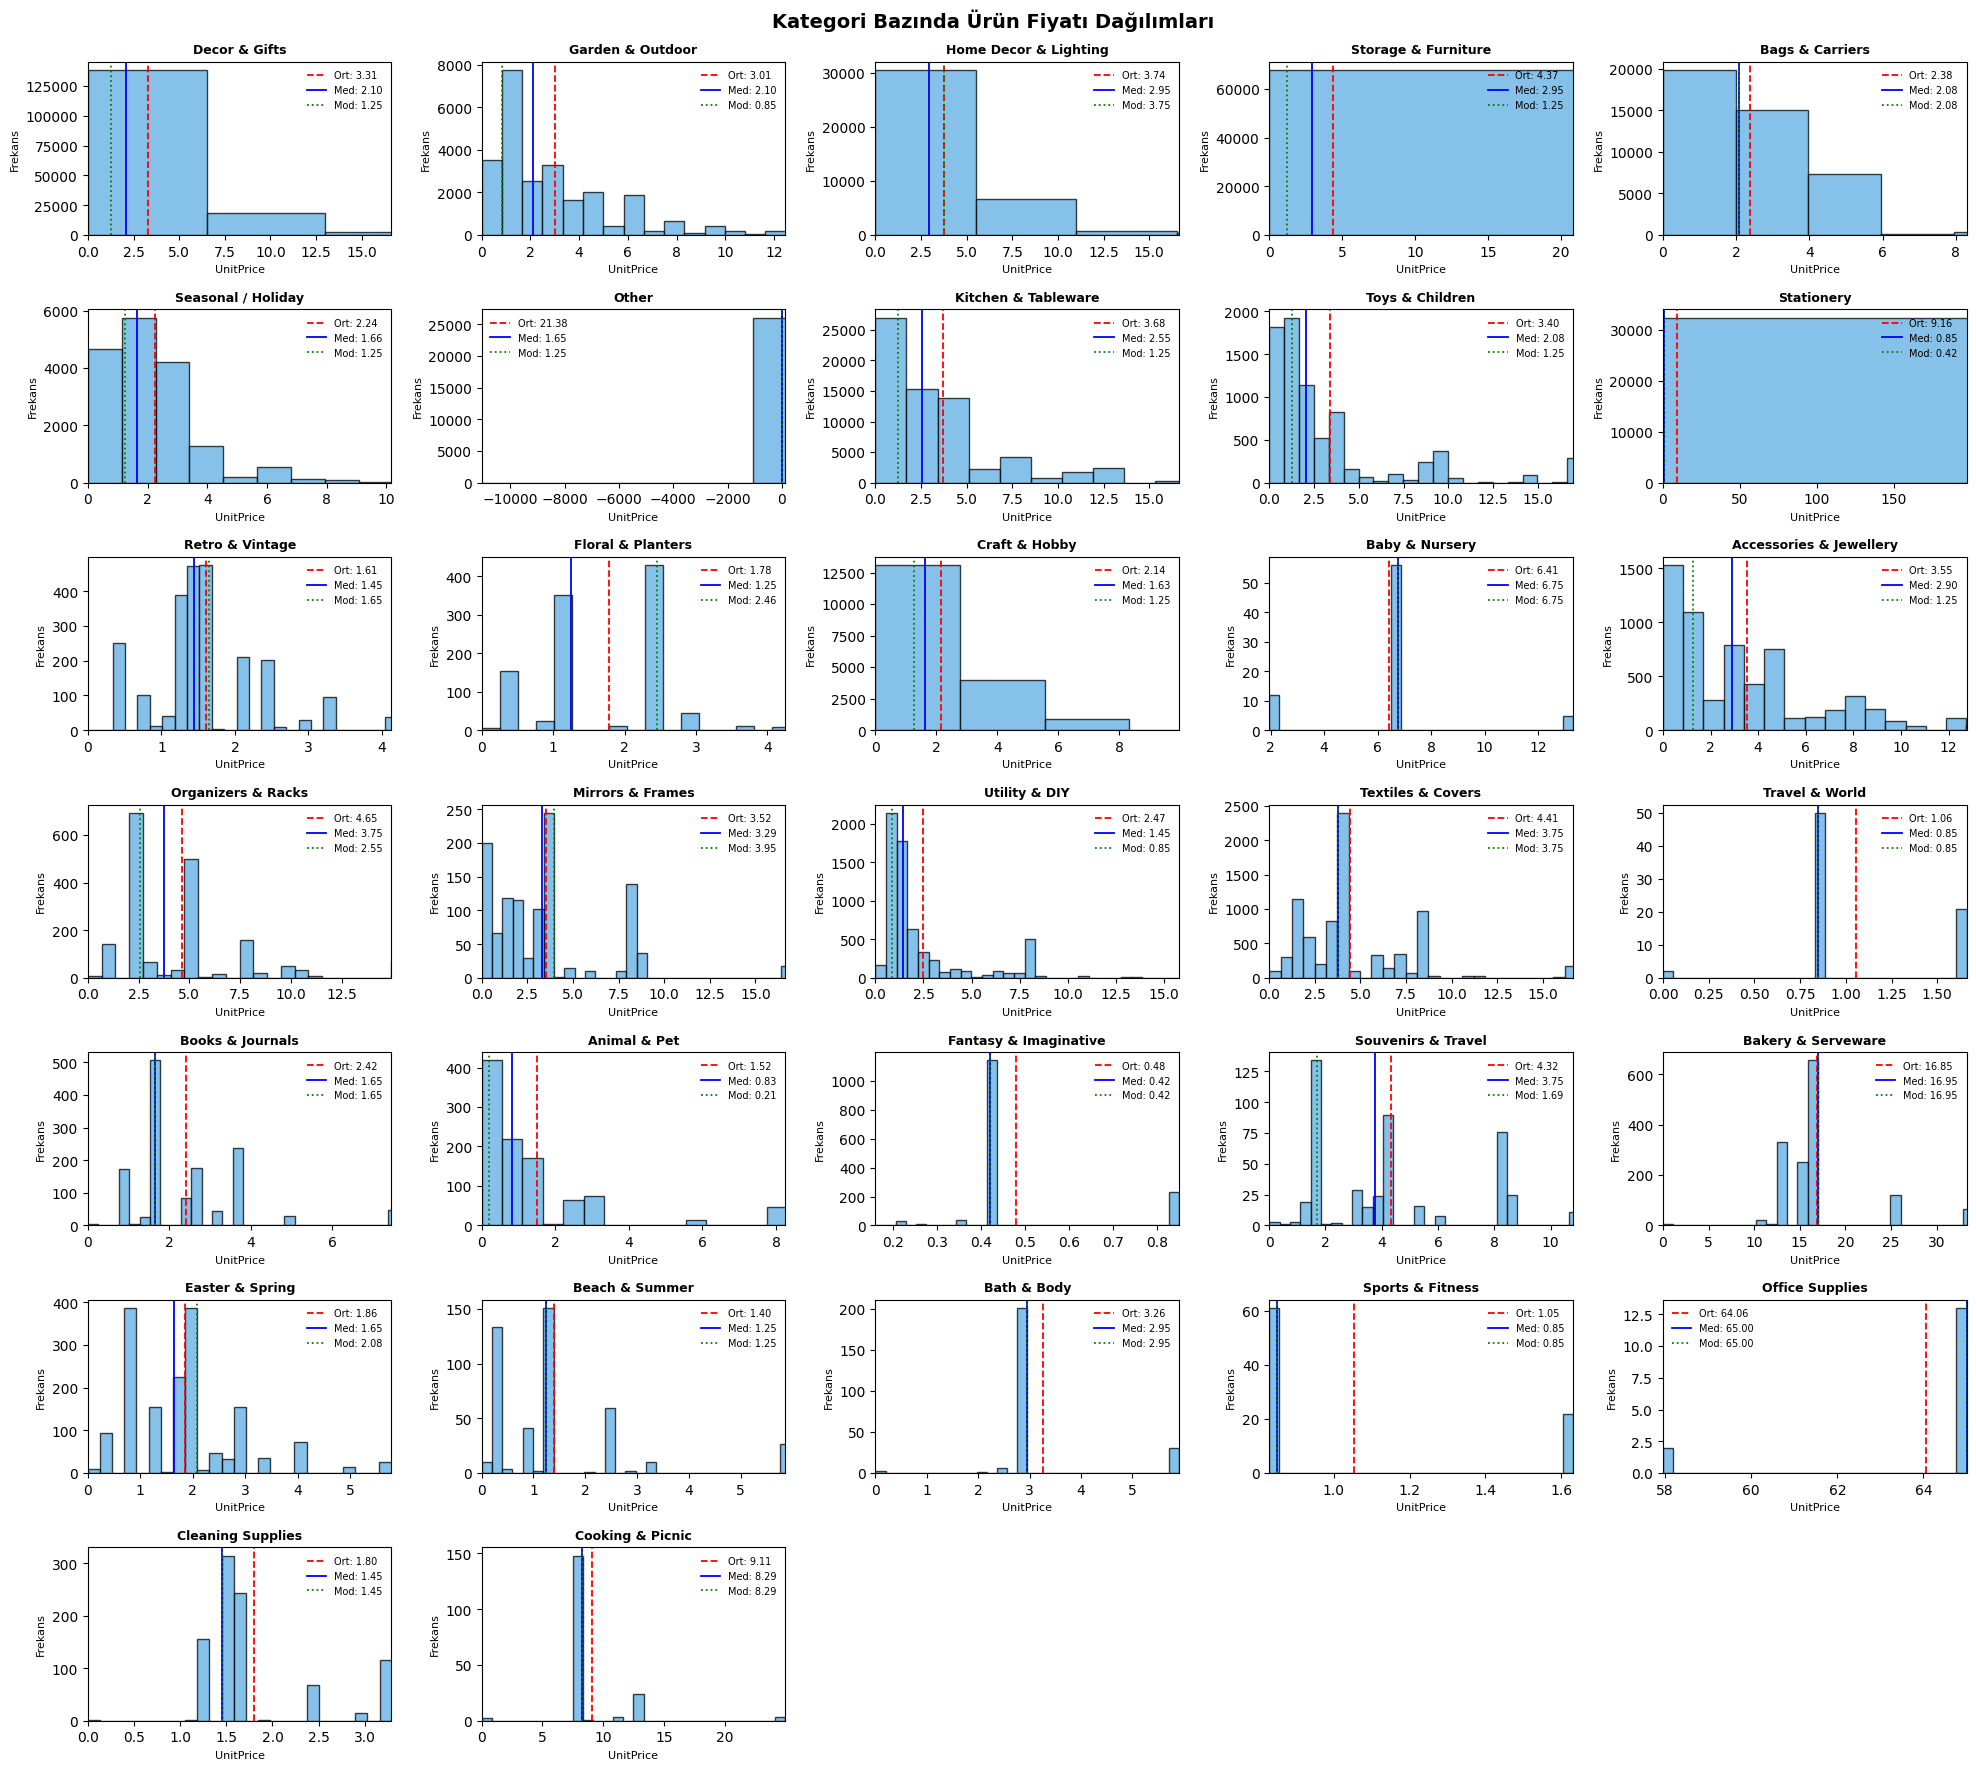


KATEGORİ VERİ KONTROL RAPORU
✓  Decor & Gifts: 160,748 kayıt
✓  Garden & Outdoor: 25,027 kayıt
✓  Home Decor & Lighting: 38,418 kayıt
✓  Storage & Furniture: 68,390 kayıt
✓  Bags & Carriers: 42,851 kayıt
✓  Seasonal / Holiday: 17,103 kayıt
✓  Other: 26,201 kayıt
✓  Kitchen & Tableware: 68,510 kayıt
✓  Toys & Children: 7,704 kayıt
✓  Stationery: 32,643 kayıt
✓  Retro & Vintage: 2,346 kayıt
✓  Floral & Planters: 1,049 kayıt
✓  Craft & Hobby: 18,124 kayıt
✓  Baby & Nursery: 73 kayıt
✓  Accessories & Jewellery: 6,185 kayıt
✓  Organizers & Racks: 1,821 kayıt
✓  Mirrors & Frames: 1,107 kayıt
✓  Utility & DIY: 6,459 kayıt
✓  Textiles & Covers: 7,818 kayıt
✓  Travel & World: 73 kayıt
✓  Books & Journals: 1,337 kayıt
✓  Animal & Pet: 1,021 kayıt
✓  Fantasy & Imaginative: 1,454 kayıt
✓  Souvenirs & Travel: 457 kayıt
✓  Bakery & Serveware: 1,457 kayıt
✓  Easter & Spring: 1,655 kayıt
✓  Beach & Summer: 442 kayıt
✓  Bath & Body: 241 kayıt
✓  Sports & Fitness: 83 kayıt
✓  Office Supplies: 15 kayıt


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Kategori listesini al
categories = df_cleaned["category"].unique()
n_categories = len(categories)

# Her satırda 5 grafik
cols = 5
rows = int(np.ceil(n_categories / cols))

# dengeli boyut
plt.figure(figsize=(20, rows * 2.5))

for i, cat in enumerate(categories, 1):
    plt.subplot(rows, cols, i)

    # Veriyi filtrele ve NaN değerleri temizle
    data = df_cleaned.loc[df_cleaned["category"] == cat, "UnitPrice"].dropna()

    # Boş veri kontrolü
    if len(data) == 0:
        plt.text(0.5, 0.5, 'Veri Yok',
                 horizontalalignment='center',
                 verticalalignment='center',
                 transform=plt.gca().transAxes,
                 fontsize=10, color='red')
        plt.title(cat, fontsize=9, weight='bold')
        plt.xlabel("UnitPrice", fontsize=8)
        plt.ylabel("Frekans", fontsize=8)
        continue

    # Histogram
    plt.hist(data, bins=30, edgecolor='black', alpha=0.75, color="#5DADE2")

    # Ortalama, medyan, mod
    mean_value = data.mean()
    median_value = data.median()
    mode_value = data.mode().iloc[0] if not data.mode().empty else np.nan

    # Çizgiler
    plt.axvline(mean_value, color='red', linestyle='--', linewidth=1.3,
                label=f'Ort: {mean_value:.2f}')
    plt.axvline(median_value, color='blue', linestyle='-', linewidth=1.3,
                label=f'Med: {median_value:.2f}')
    if not np.isnan(mode_value):
        plt.axvline(mode_value, color='green', linestyle=':', linewidth=1.3,
                    label=f'Mod: {mode_value:.2f}')

    # Başlık ve etiketler
    plt.title(cat, fontsize=9, weight='bold')
    plt.xlabel("UnitPrice", fontsize=8)
    plt.ylabel("Frekans", fontsize=8)
    plt.legend(fontsize=7, frameon=False)

    # Eksen sınırlarını otomatik daralt (boş veri kontrolü ile)
    if len(data) > 0:
        try:
            upper_limit = np.percentile(data, 99)
            plt.xlim(data.min(), upper_limit)
        except:
            # Eğer percentile hesaplanamıyorsa, min-max kullan
            plt.xlim(data.min(), data.max())

plt.tight_layout(pad=1.2)
plt.suptitle("Kategori Bazında Ürün Fiyatı Dağılımları",
             fontsize=14, weight='bold', y=1.01)
plt.show()

# Ek: Hangi kategorilerde veri var/yok göster
print("\n" + "="*60)
print("KATEGORİ VERİ KONTROL RAPORU")
print("="*60)
for cat in categories:
    count = len(df_cleaned.loc[df_cleaned["category"] == cat, "UnitPrice"].dropna())
    if count == 0:
        print(f"⚠️  {cat}: VERİ YOK")
    else:
        print(f"✓  {cat}: {count:,} kayıt")


In [25]:

import matplotlib.pyplot as plt
import seaborn as sns

# Görselleştirme ayarları
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [26]:
# 1. Veri boyutu
print(f"\n Veri Boyutu: {df_cleaned.shape[0]:,} satır × {df_cleaned.shape[1]} sütun")


 Veri Boyutu: 541,909 satır × 23 sütun


In [27]:
# 2. Sütun bilgileri
df_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'category', 'InvoiceDateOnly', 'Year', 'Month',
       'Day', 'DayOfWeekNum', 'IsWeekend', 'DayOfWeekName', 'MonthName',
       'Season', 'IsReturn', 'TotalPrice', 'CustomerIDInvoiceNo',
       'Description_filled', 'IsSuspiciousReturn', 'is_holiday'],
      dtype='object')

In [28]:
# 3. Veri tipleri dağılımı
print(f"\n Veri Tipi Dağılımı:")
print(df_cleaned.dtypes.value_counts())


 Veri Tipi Dağılımı:
object            11
int64              5
bool               4
float64            2
datetime64[ns]     1
Name: count, dtype: int64


In [29]:
# 4. Bellek kullanımı
memory_usage = df_cleaned.memory_usage(deep=True).sum() / 1024**2
print(f"\n Toplam Bellek Kullanımı: {memory_usage:.2f} MB")


 Toplam Bellek Kullanımı: 374.88 MB


In [30]:
# 6. Temel istatistikler
print(f"\n Sayısal Sütunlar İçin Temel İstatistikler:")
print(df_cleaned.describe())


 Sayısal Sütunlar İçin Temel İstatistikler:
            Quantity      UnitPrice                InvoiceDateOnly  \
count  541909.000000  541909.000000                         541909   
mean        9.552250       4.611114  2011-07-04 00:00:13.073781760   
min    -80995.000000  -11062.060000            2010-12-01 00:00:00   
25%         1.000000       1.250000            2011-03-28 00:00:00   
50%         3.000000       2.080000            2011-07-19 00:00:00   
75%        10.000000       4.130000            2011-10-19 00:00:00   
max     80995.000000   38970.000000            2011-12-09 00:00:00   
std       218.081158      96.759853                            NaN   

                Year          Month            Day   DayOfWeekNum  \
count  541909.000000  541909.000000  541909.000000  541909.000000   
mean     2010.921609       7.553128      15.023096       3.599726   
min      2010.000000       1.000000       1.000000       1.000000   
25%      2011.000000       5.000000       7.0000

In [31]:
# 7. Kategorik sütunlar için özet
print(f"\n Kategorik Sütunlar İçin Özet:")
categorical_cols = df_cleaned.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    unique_count = df_cleaned[col].nunique()
    print(f"  - {col}: {unique_count} benzersiz değer")


 Kategorik Sütunlar İçin Özet:
  - InvoiceNo: 25911 benzersiz değer
  - StockCode: 4070 benzersiz değer
  - InvoiceDate: 23260 benzersiz değer
  - CustomerID: 4373 benzersiz değer
  - Country: 38 benzersiz değer
  - category: 32 benzersiz değer
  - IsWeekend: 2 benzersiz değer
  - DayOfWeekName: 6 benzersiz değer
  - MonthName: 12 benzersiz değer
  - Season: 4 benzersiz değer
  - IsReturn: 2 benzersiz değer
  - CustomerIDInvoiceNo: 25900 benzersiz değer
  - Description_filled: 4224 benzersiz değer
  - IsSuspiciousReturn: 2 benzersiz değer
  - is_holiday: 2 benzersiz değer


## 2) Eksik Degerler Degerlendirilmisti Zaten

## 3)Sayisal Degisken Dagilimlari

In [32]:



numeric_cols = df_cleaned.select_dtypes(include=["number"]).columns.tolist()

# Gereksiz (ID ve zaman) değişkenleri çıkar
exclude_cols = ['CustomerID', 'Year', 'Month', 'Day', 'DayOfWeekNum', 'HourOfDay']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Veriyi hazırla
pair_data = df_cleaned[numeric_cols].dropna()





a) Kategorilere Göre Fiyat Incelenmesinde Aykiri Degerler

In [33]:
init_price_by_category = df_cleaned.groupby(["category","Description_filled"])["UnitPrice"].first()

init_price_by_category

category                 Description_filled               
Accessories & Jewellery  5 STRAND GLASS NECKLACE AMBER         6.35
                         5 STRAND GLASS NECKLACE AMETHYST      6.37
                         5 STRAND GLASS NECKLACE BLACK         6.37
                         5 STRAND GLASS NECKLACE CRYSTAL       6.35
                         6 RIBBONS SHIMMERING PINKS            0.42
                                                              ...  
Utility & DIY            WHITE WIRE EGG HOLDER                11.87
                         WOOD BLACK BOARD ANT WHITE FINISH    13.57
                         check                                 0.00
                         sold as set on dotcom                 0.00
                         sold as set on dotcom and amazon      0.00
Name: UnitPrice, Length: 4345, dtype: float64

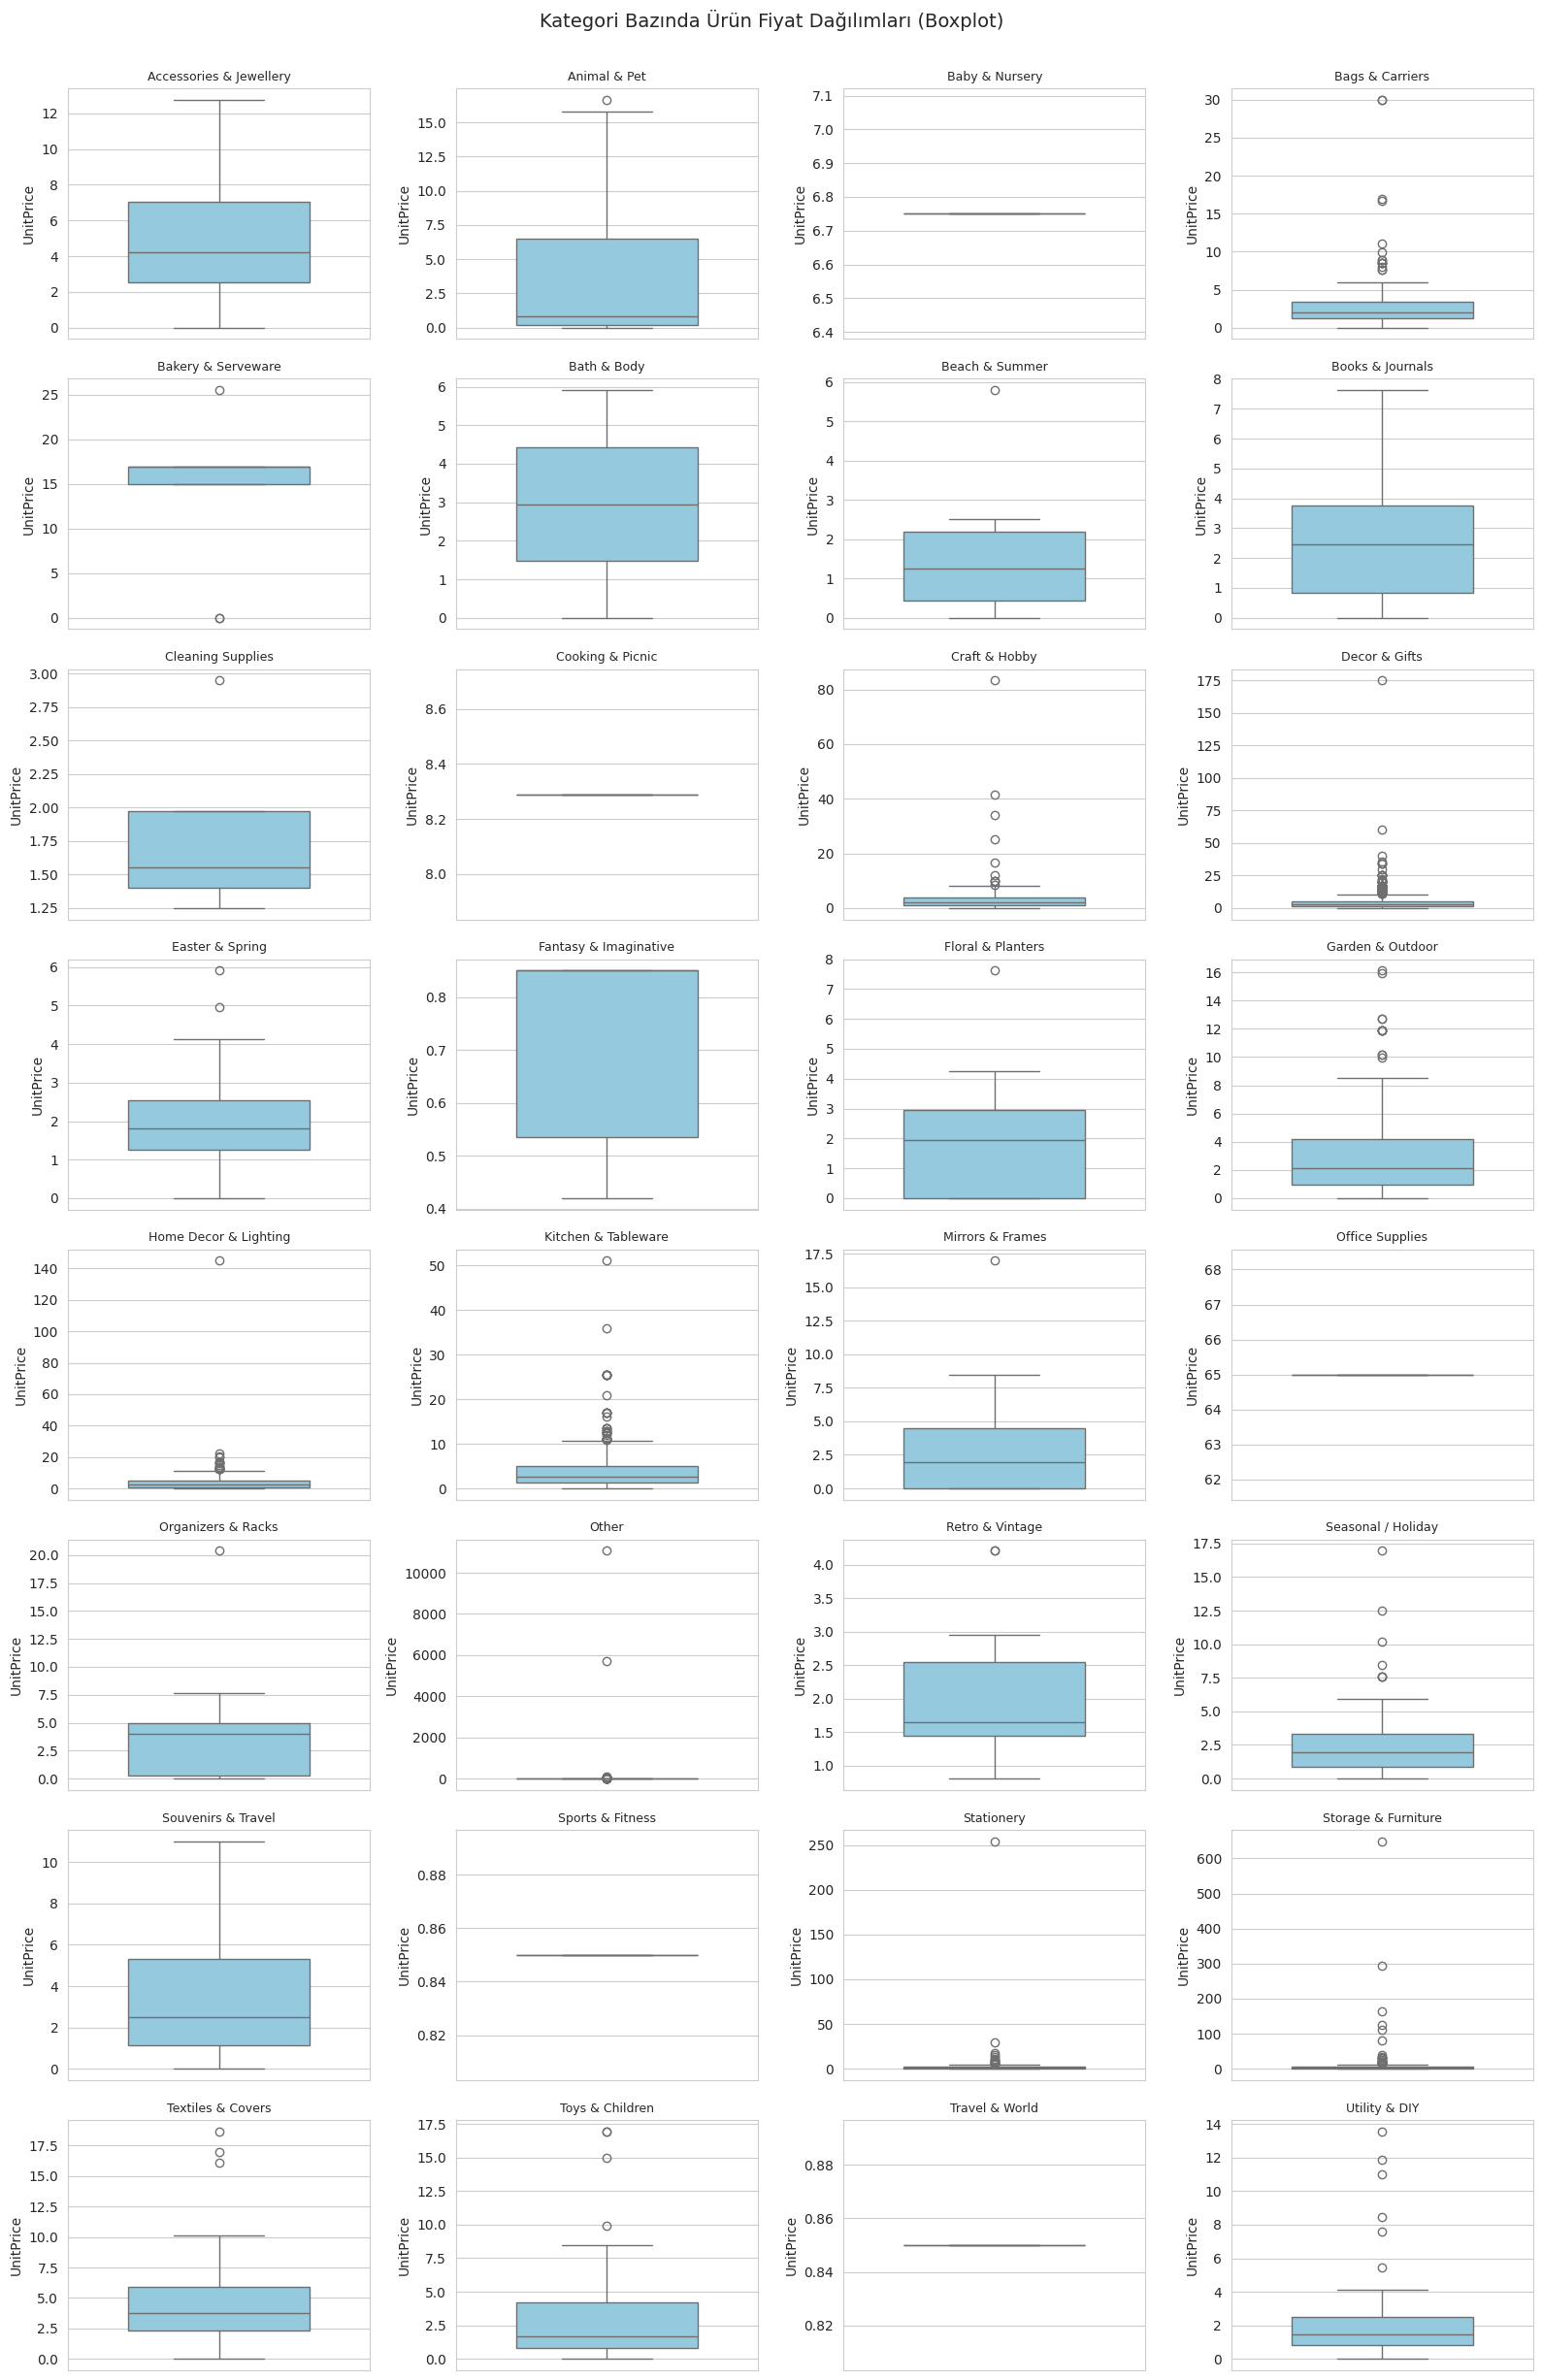

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Verinin sütun isimleri: category, Description_filled, UnitPrice
categories = init_price_by_category.index.get_level_values("category").unique()
n_categories = len(categories)

# Her satırda 4 grafik olacak
cols = 4
rows = math.ceil(n_categories / cols)

# Görsel boyutu (biraz daha makul tutabiliriz)
plt.figure(figsize=(16, rows * 3))

for i, cat in enumerate(categories, 1):
    plt.subplot(rows, cols, i)
    # Filtrele
    data = init_price_by_category.loc[cat].reset_index()

    # Dikey boxplot (y ekseninde fiyat)
    sns.boxplot(y="UnitPrice", data=data, color="skyblue", width=0.6)

    plt.title(cat, fontsize=9)
    plt.ylabel("UnitPrice")
    plt.xlabel("")
    plt.tight_layout()

plt.suptitle("Kategori Bazında Ürün Fiyat Dağılımları (Boxplot)", fontsize=14, y=1.02)

# Save before showing
plt.savefig("category_price_boxplots.png", bbox_inches="tight", dpi=300)
plt.show()


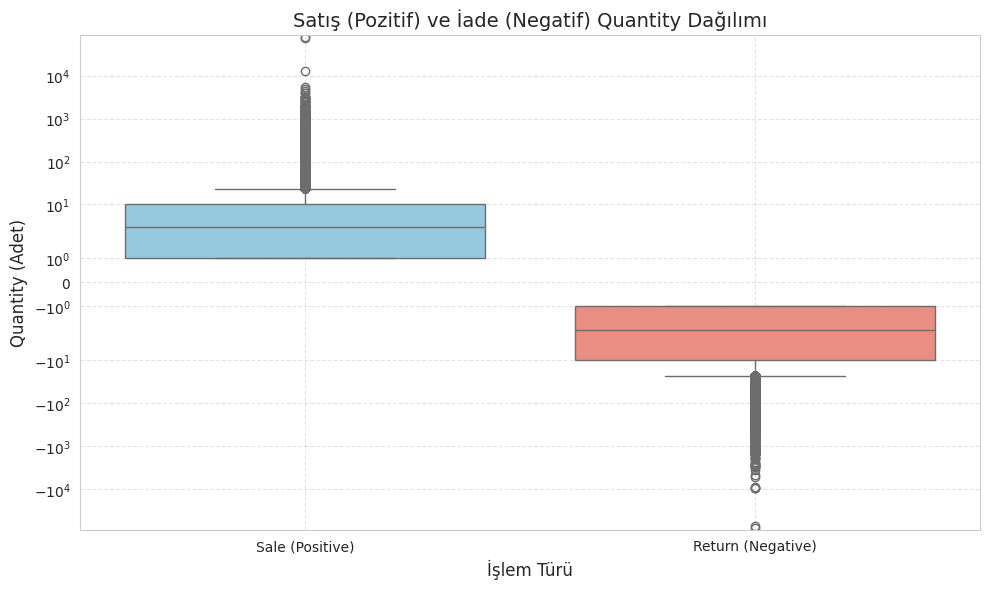

In [35]:
# Quantity icin Aykiri Deger Incelemesi

import matplotlib.pyplot as plt
import seaborn as sns

# Negatif (iade) ve pozitif (satış) değerleri ayırt eden sütun
df_cleaned["QuantityType"] = df_cleaned["Quantity"].apply(lambda x: "Return (Negative)" if x < 0 else "Sale (Positive)")

plt.figure(figsize=(10, 6))

# Boxplot - pozitif ve negatif değerlerin dağılımını gösterir
sns.boxplot(
    x="QuantityType",
    y="Quantity",
    data=df_cleaned,
    palette={"Sale (Positive)": "skyblue", "Return (Negative)": "salmon"}
)

plt.yscale("symlog")  # Hem pozitif hem negatif büyük değerleri log ölçeğinde gösterir
plt.title("Satış (Pozitif) ve İade (Negatif) Quantity Dağılımı", fontsize=14)
plt.xlabel("İşlem Türü", fontsize=12)
plt.ylabel("Quantity (Adet)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


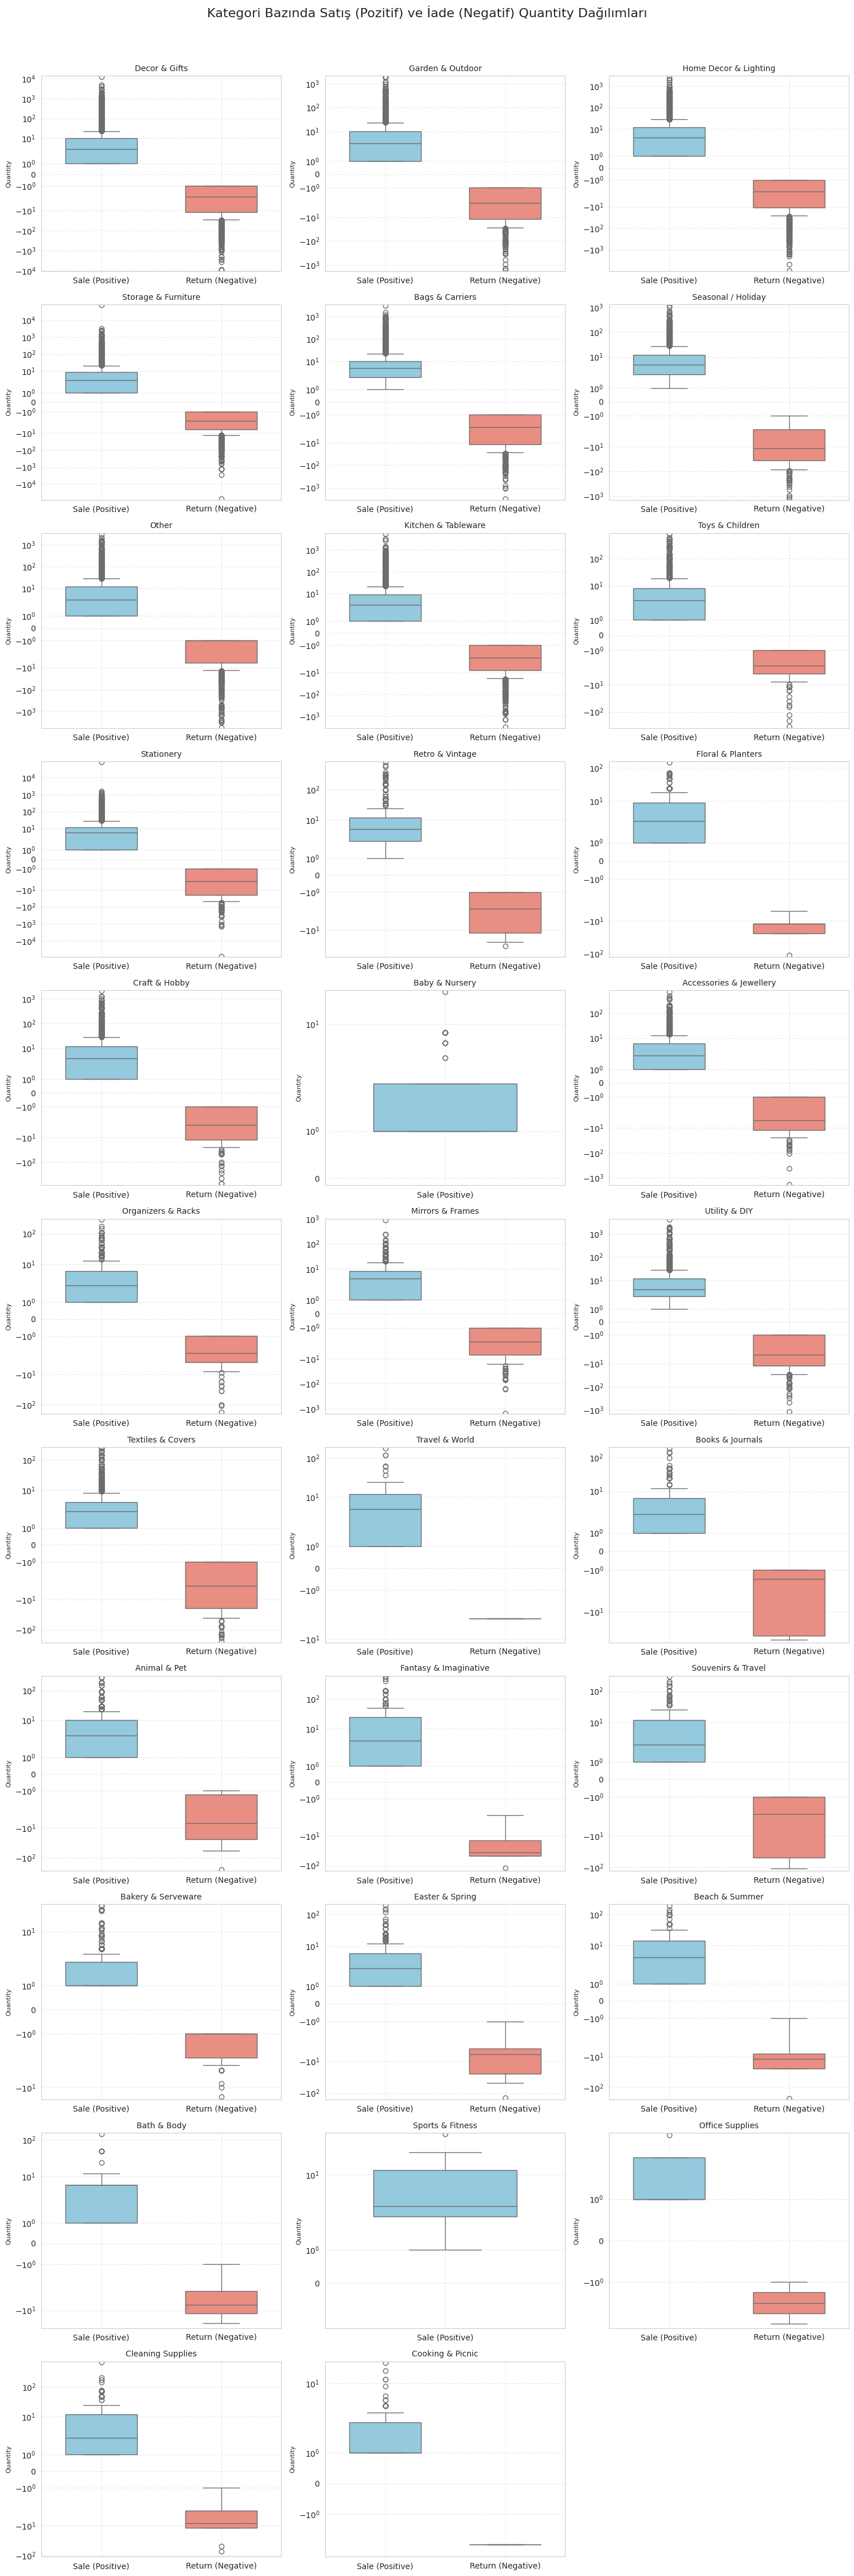

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Pozitif ve negatif Quantity ayrımı


# Kategorileri al
categories = df_cleaned["category"].unique()
n_categories = len(categories)

# Her satırda 3 grafik
cols = 3
rows = math.ceil(n_categories / cols)

plt.figure(figsize=(15, rows * 4))

for i, cat in enumerate(categories, 1):
    plt.subplot(rows, cols, i)
    subset = df_cleaned[df_cleaned["category"] == cat]

    sns.boxplot(
        data=subset,
        x="QuantityType",
        y="Quantity",
        palette={"Sale (Positive)": "skyblue", "Return (Negative)": "salmon"},
        width=0.6
    )
    plt.yscale("symlog")  # Hem pozitif hem negatif büyük değerleri görebilmek için
    plt.title(cat, fontsize=10)
    plt.xlabel("")
    plt.ylabel("Quantity", fontsize=8)
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()

plt.suptitle("Kategori Bazında Satış (Pozitif) ve İade (Negatif) Quantity Dağılımları", fontsize=16, y=1.02)
plt.show()


In [37]:
# Log ölçek sayesinde hem küçük hem çok büyük değerler aynı eksende görünür.

# Bazı kategorilerde “çok geniş” mavi kutular varsa → büyük satış çeşitliliği veya toptan satışlar var demektir.

# Kırmızı tarafta uzun kuyruklar varsa → toplu iadeler görülüyor demektir.#  Other Kategorisi mesela

In [ ]:
# Hem Unit Price hem de Quantity Beraber / Kategori Bazli
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sadece gerekli sütunlar
data = df_cleaned[["UnitPrice", "Quantity", "IsReturn", "category"]].copy()

# Quantity negatifse mutlak değere çevir
data["Quantity_abs"] = data["Quantity"].abs()

# Log dönüşümü (0 değerler için +1 ekliyoruz)
data["UnitPrice_log"] = np.log1p(data["UnitPrice"])
data["Quantity_log"] = np.log1p(data["Quantity_abs"])

# Eğer çok fazla kategori varsa sadece en çok satış yapan 9 kategoriyi al
top_categories = data["category"].value_counts().head(30).index
data = data[data["category"].isin(top_categories)]

# FacetGrid ile kategori bazlı scatterplot
g = sns.FacetGrid(
    data,
    col="category",
    hue="IsReturn",
    col_wrap=3,   # Her satırda 3 grafik
    height=4,
    palette={False: "skyblue", True: "salmon"},
    sharex=True,
    sharey=True
)

g.map_dataframe(sns.scatterplot, x="UnitPrice_log", y="Quantity_log", alpha=0.6)
g.add_legend(title="IsReturn")
g.set_axis_labels("Log(UnitPrice + 1)", "Log(Quantity + 1)")
g.fig.suptitle("Kategori Bazlı Log(UnitPrice) vs Log(Quantity) (Satış ve İadeler)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
# KATEGORIK DEGISKEN ANALIZI



In [ ]:
df_cleaned.head(3)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 80)
print("📊 BÖLÜM 5: KATEGORİK DEĞİŞKENLER ANALİZİ")
print("=" * 80)

# Kategorik sütunları seç
categorical_cols = df_cleaned.select_dtypes(include=['object', 'bool']).columns.tolist()

# ID ve açıklama sütunlarını çıkar
exclude_cols = ['InvoiceNo', 'StockCode', 'Description_filled', 'InvoiceStockID']
categorical_cols = [col for col in categorical_cols if col not in exclude_cols]

print(f"\n✓ Analiz Edilecek Kategorik Değişkenler: {categorical_cols}")

# 1. Her değişken için frekans analizi
print(f"\n{'=' * 80}")
print("📈 FREKANS ANALİZİ")
print("=" * 80)

for col in categorical_cols:
    print(f"\n--- {col.upper()} ---")
    value_counts = df_cleaned[col].value_counts()
    value_percent = df_cleaned[col].value_counts(normalize=True) * 100

    summary = pd.DataFrame({
        'Değer': value_counts.index,
        'Sayı': value_counts.values,
        'Yüzde': value_percent.values
    })

    print(f"  Benzersiz Değer Sayısı: {df_cleaned[col].nunique()}")
    print(f"\n  En Sık 10 Değer:")
    print(summary.head(10).to_string(index=False))

# 2. Görselleştirme - Bar Charts
print(f"\n{'=' * 80}")
print("📊 KATEGORİK DEĞİŞKEN DAĞILIMLARI")
print("=" * 80)

for col in categorical_cols:
    plt.figure(figsize=(12, 6))

    # Eğer çok fazla kategori varsa, sadece ilk 15'ini göster
    value_counts = df_cleaned[col].value_counts()
    if len(value_counts) > 15:
        value_counts = value_counts.head(15)
        title_suffix = " (İlk 15)"
    else:
        title_suffix = ""

    value_counts.plot(kind='bar', edgecolor='black', alpha=0.7)
    plt.title(f'{col} - Dağılım{title_suffix}')
    plt.xlabel(col)
    plt.ylabel('Frekans')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 3. Boolean değişkenler için özel analiz
boolean_cols = df_cleaned.select_dtypes(include=['bool']).columns.tolist()

if len(boolean_cols) > 0:
    print(f"\n{'=' * 80}")
    print("✅ BOOLEAN DEĞİŞKENLER")
    print("=" * 80)

    for col in boolean_cols:
        true_count = df_cleaned[col].sum()
        false_count = len(df_cleaned) - true_count
        true_percent = (true_count / len(df_cleaned)) * 100

        print(f"\n--- {col.upper()} ---")
        print(f"  True: {true_count:,} ({true_percent:.2f}%)")
        print(f"  False: {false_count:,} ({100-true_percent:.2f}%)")

    # Pie chart
    fig, axes = plt.subplots(1, len(boolean_cols), figsize=(5*len(boolean_cols), 5))
    if len(boolean_cols) == 1:
        axes = [axes]

    for idx, col in enumerate(boolean_cols):
        counts = df_cleaned[col].value_counts()
        axes[idx].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        axes[idx].set_title(f'{col} - Dağılım')

    plt.tight_layout()
    plt.show()

Korelasyon Analizi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 80)
print("🔗 BÖLÜM 6: KORELASYON ANALİZİ")
print("=" * 80)

# Sayısal sütunları seç
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# 1. Korelasyon matrisi hesapla
correlation_matrix = df_cleaned[numeric_cols].corr()

print(f"\n✓ Korelasyon matrisi hesaplandı ({len(numeric_cols)} değişken)")

# 2. En yüksek korelasyonları bul
print(f"\n{'=' * 80}")
print("📊 EN YÜKSEK KORELASYONLAR (Mutlak Değer)")
print("=" * 80)

# Üst üçgen kısmını al (tekrarları önlemek için)
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Stack ve sırala
correlations = upper_triangle.stack().reset_index()
correlations.columns = ['Değişken_1', 'Değişken_2', 'Korelasyon']
correlations['Mutlak_Korelasyon'] = correlations['Korelasyon'].abs()
correlations = correlations.sort_values('Mutlak_Korelasyon', ascending=False)

print(f"\n✓ En Yüksek 20 Korelasyon:")
print(correlations.head(20).to_string(index=False))

# 3. Pozitif ve negatif korelasyonlar
print(f"\n{'=' * 80}")
print("📈 EN YÜKSEK POZİTİF KORELASYONLAR")
print("=" * 80)
positive_corr = correlations[correlations['Korelasyon'] > 0].head(10)
print(positive_corr.to_string(index=False))

print(f"\n{'=' * 80}")
print("📉 EN YÜKSEK NEGATİF KORELASYONLAR")
print("=" * 80)
negative_corr = correlations[correlations['Korelasyon'] < 0].head(10)
print(negative_corr.to_string(index=False))

# 4. Korelasyon heatmap
print(f"\n{'=' * 80}")
print("🔥 KORELASYON HEATMAP")
print("=" * 80)

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Korelasyon Matrisi Heatmap')
plt.tight_layout()
plt.show()

# 5. Sadece yüksek korelasyonları göster (|r| > 0.5)
high_corr = correlations[correlations['Mutlak_Korelasyon'] > 0.5]

if len(high_corr) > 0:
    print(f"\n{'=' * 80}")
    print("⚠️ YÜKSEK KORELASYONLAR (|r| > 0.5)")
    print("=" * 80)
    print(high_corr.to_string(index=False))

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(high_corr)), high_corr['Korelasyon'])
    plt.yticks(range(len(high_corr)),
               [f"{row['Değişken_1']} - {row['Değişken_2']}"
                for _, row in high_corr.iterrows()])
    plt.xlabel('Korelasyon Katsayısı')
    plt.title('Yüksek Korelasyonlar (|r| > 0.5)')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
    plt.tight_layout()
    plt.show()
else:
    print(f"\n✓ Yüksek korelasyon (|r| > 0.5) bulunamadı.")

# 6. Multicollinearity uyarısı
very_high_corr = correlations[correlations['Mutlak_Korelasyon'] > 0.8]
if len(very_high_corr) > 0:
    print(f"\n{'=' * 80}")
    print("⚠️⚠️ ÇOK YÜKSEK KORELASYON UYARISI (|r| > 0.8)")
    print("Multicollinearity riski var!")
    print("=" * 80)
    print(very_high_corr.to_string(index=False))

Degiskenler Arasi Iliskiler

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 80)
print("🎯 BÖLÜM 7: DEĞİŞKENLER ARASI İLİŞKİLER")
print("=" * 80)

# Ana sayısal değişkenleri seç
main_numeric_cols = ['Quantity', 'UnitPrice', 'TotalPrice']

# 1. Pairplot (tüm kombinasyonlar)
print(f"\n{'=' * 80}")
print("📊 PAIRPLOT (Tüm Kombinasyonlar)")
print("=" * 80)

print("\n⏳ Pairplot oluşturuluyor (bu biraz zaman alabilir)...")
sns.pairplot(df_cleaned[main_numeric_cols], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Sayısal Değişkenler - Pairplot', y=1.02)
plt.tight_layout()
plt.show()

# 2. Önemli ilişkiler için detaylı scatter plots
print(f"\n{'=' * 80}")
print("📈 DETAYLI SCATTER PLOTS")
print("=" * 80)

# Quantity vs TotalPrice
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.scatter(df_cleaned['Quantity'], df_cleaned['TotalPrice'], alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('TotalPrice')
plt.title('Quantity vs TotalPrice')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)

# UnitPrice vs TotalPrice
plt.subplot(1, 3, 2)
plt.scatter(df_cleaned['UnitPrice'], df_cleaned['TotalPrice'], alpha=0.5)
plt.xlabel('UnitPrice')
plt.ylabel('TotalPrice')
plt.title('UnitPrice vs TotalPrice')

# Quantity vs UnitPrice
plt.subplot(1, 3, 3)
plt.scatter(df_cleaned['Quantity'], df_cleaned['UnitPrice'], alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Quantity vs UnitPrice')

plt.tight_layout()
plt.show()

# 3. Kategorik vs Sayısal ilişkiler
print(f"\n{'=' * 80}")
print("📊 KATEGORİK vs SAYISAL İLİŞKİLER")
print("=" * 80)

# IsReturn vs TotalPrice
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
df_cleaned.boxplot(column='TotalPrice', by='IsReturn', ax=plt.gca())
plt.title('TotalPrice - İade Durumuna Göre')
plt.suptitle('')
plt.xlabel('IsReturn')
plt.ylabel('TotalPrice')

# is_holiday vs TotalPrice
plt.subplot(1, 3, 2)
df_cleaned.boxplot(column='TotalPrice', by='is_holiday', ax=plt.gca())
plt.title('TotalPrice - Tatil Durumuna Göre')
plt.suptitle('')
plt.xlabel('is_holiday')
plt.ylabel('TotalPrice')

# IsWeekend vs TotalPrice
plt.subplot(1, 3, 3)
df_cleaned.boxplot(column='TotalPrice', by='IsWeekend', ax=plt.gca())
plt.title('TotalPrice - Hafta Sonu Durumuna Göre')
plt.suptitle('')
plt.xlabel('IsWeekend')
plt.ylabel('TotalPrice')

plt.tight_layout()
plt.show()

# 4. Season vs TotalPrice
print(f"\n🌍 Mevsime Göre Ortalama TotalPrice:")
season_stats = df_cleaned.groupby('Season')['TotalPrice'].agg(['mean', 'median', 'std', 'count'])
print(season_stats)

plt.figure(figsize=(10, 6))
df_cleaned.boxplot(column='TotalPrice', by='Season')
plt.title('TotalPrice - Mevsime Göre')
plt.suptitle('')
plt.xlabel('Season')
plt.ylabel('TotalPrice')
plt.tight_layout()
plt.show()

In [ ]:
# Veri Kalitesi ve Özel Kontroller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 80)
print("🔬 BÖLÜM 8: VERİ KALİTESİ & ÖZEL KONTROLLER")
print("=" * 80)

# Ensure 'InvoiceDate' is datetime objects
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


# 1. Duplicate (Tekrar Eden) Kayıtlar
print(f"\n{'=' * 80}")
print("🔍 DUPLICATE KAYIT KONTROLÜ")
print("=" * 80)

duplicate_count = df_cleaned.duplicated().sum()
duplicate_percent = (duplicate_count / len(df_cleaned)) * 100

print(f"✓ Toplam Duplicate Kayıt: {duplicate_count:,} ({duplicate_percent:.2f}%)")

if duplicate_count > 0:
    print(f"\n⚠ Duplicate kayıt örnekleri:")
    duplicates = df_cleaned[df_cleaned.duplicated(keep=False)]
    print(duplicates.head(10))

# 2. Negatif Değerler (İadeler)
print(f"\n{'=' * 80}")
print("➖ NEGATİF DEĞER ANALİZİ")
print("=" * 80)

# Quantity negatif olanlar
negative_quantity = df_cleaned[df_cleaned['Quantity'] < 0]
print(f"✓ Negatif Quantity: {len(negative_quantity):,} ({len(negative_quantity)/len(df_cleaned)*100:.2f}%)")

# TotalPrice negatif olanlar
negative_price = df_cleaned[df_cleaned['TotalPrice'] < 0]
print(f"✓ Negatif TotalPrice: {len(negative_price):,} ({len(negative_price)/len(df_cleaned)*100:.2f}%)")

# UnitPrice negatif olanlar
negative_unit = df_cleaned[df_cleaned['UnitPrice'] < 0]
print(f"✓ Negatif UnitPrice: {len(negative_unit):,} ({len(negative_unit)/len(df_cleaned)*100:.2f}%)")

# 3. Sıfır Değerler
print(f"\n{'=' * 80}")
print("0️⃣ SIFIR DEĞER ANALİZİ")
print("=" * 80)

zero_quantity = df_cleaned[df_cleaned['Quantity'] == 0]
print(f"✓ Sıfır Quantity: {len(zero_quantity):,} ({len(zero_quantity)/len(df_cleaned)*100:.2f}%)")

zero_price = df_cleaned[df_cleaned['UnitPrice'] == 0]
print(f"✓ Sıfır UnitPrice: {len(zero_price):,} ({len(zero_price)/len(df_cleaned)*100:.2f}%)")

zero_total = df_cleaned[df_cleaned['TotalPrice'] == 0]
print(f"✓ Sıfır TotalPrice: {len(zero_total):,} ({len(zero_total)/len(df_cleaned)*100:.2f}%)")

# 4. İade Analizi
print(f"\n{'=' * 80}")
print("🔄 İADE ANALİZİ")
print("=" * 80)

return_stats = df_cleaned['IsReturn'].value_counts()
print(f"✓ İade Dağılımı:")
print(return_stats)
print(f"\n✓ İade Oranı: {df_cleaned['IsReturn'].mean()*100:.2f}%")

# Check if 'IsSuspiciousReturn' column exists before accessing it
if 'IsSuspiciousReturn' in df_cleaned.columns:
    suspicious_stats = df_cleaned['IsSuspiciousReturn'].value_counts()
    print(f"\n✓ Şüpheli İade Dağılımı:")
    print(suspicious_stats)
    print(f"✓ Şüpheli İade Oranı: {df_cleaned['IsSuspiciousReturn'].mean()*100:.2f}%")
else:
    print("\n✓ 'IsSuspiciousReturn' sütunu bulunamadı.")


# 5. Tutarsızlık Kontrolleri
print(f"\n{'=' * 80}")
print("⚠️ TUTARSIZLIK KONTROLLERI")
print("=" * 80)

# TotalPrice = Quantity * UnitPrice kontrolü
df_cleaned['Calculated_TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_cleaned['Price_Mismatch'] = ~np.isclose(df_cleaned['TotalPrice'],
                                             df_cleaned['Calculated_TotalPrice'],
                                             rtol=0.01, equal_nan=True) # Added equal_nan=True to handle NaN values

mismatch_count = df_cleaned['Price_Mismatch'].sum()
print(f"✓ Fiyat Tutarsızlığı: {mismatch_count:,} ({mismatch_count/len(df_cleaned)*100:.2f}%)")

if mismatch_count > 0:
    print(f"\n⚠ Tutarsızlık örnekleri:")
    mismatches = df_cleaned[df_cleaned['Price_Mismatch']][
        ['Quantity', 'UnitPrice', 'TotalPrice', 'Calculated_TotalPrice']
    ].head(10)
    print(mismatches)

# Temizlik
df_cleaned = df_cleaned.drop(['Calculated_TotalPrice', 'Price_Mismatch'], axis=1)

# 6. Tarih Tutarlılığı
print(f"\n{'=' * 80}")
print("📅 TARİH TUTARLILIĞI")
print("=" * 80)

print(f"✓ İlk Tarih: {df_cleaned['InvoiceDate'].min()}")
print(f"✓ Son Tarih: {df_cleaned['InvoiceDate'].max()}")
print(f"✓ Tarih Aralığı: {(df_cleaned['InvoiceDate'].max() - df_cleaned['InvoiceDate'].min()).days} gün")

# Gelecek tarih kontrolü
future_dates = df_cleaned[df_cleaned['InvoiceDate'] > pd.Timestamp.now(tz='UTC')] # Specify timezone as UTC
print(f"✓ Gelecek Tarihli Kayıt: {len(future_dates):,}")

# 7. CustomerID Analizi
print(f"\n{'=' * 80}")
print("👥 MÜŞTERİ ANALİZİ")
print("=" * 80)

print(f"✓ Benzersiz Müşteri Sayısı: {df_cleaned['CustomerID'].nunique():,}")
print(f"✓ Eksik CustomerID: {df_cleaned['CustomerID'].isnull().sum():,}")

# Müşteri başına ortalama işlem
customer_transactions = df_cleaned.groupby('CustomerID').size()
print(f"✓ Müşteri Başına Ort. İşlem: {customer_transactions.mean():.2f}")
print(f"✓ Müşteri Başına Med. İşlem: {customer_transactions.median():.2f}")

# 8. Özet Rapor
print(f"\n{'=' * 80}")
print("📋 VERİ KALİTESİ ÖZET RAPORU")
print("=" * 80)

# Check if 'IsSuspiciousReturn' column exists before including it in the report
quality_report = {
    'Toplam Kayıt': len(df_cleaned),
    'Duplicate Kayıt': duplicate_count,
    'Negatif Quantity': len(negative_quantity),
    'Negatif TotalPrice': len(negative_price),
    'Sıfır UnitPrice': len(zero_price),
    'İade Oranı (%)': df_cleaned['IsReturn'].mean()*100,
}

if 'IsSuspiciousReturn' in df_cleaned.columns:
     quality_report['Şüpheli İade Oranı (%)'] = df_cleaned['IsSuspiciousReturn'].mean()*100


quality_df = pd.DataFrame(list(quality_report.items()), columns=['Metrik', 'Değer'])
print(quality_df.to_string(index=False))

In [ ]:
sns.boxplot(x='category', y='TotalPrice', data=df_cleaned)
plt.xticks(rotation=45)
plt.title("Kategori Bazında TotalPrice Dağılımı")
plt.show()


In [ ]:
## Unitprice´da 0 olanlar var, onlari stockcode üzerinden doldurmaya calisacagim.

1. Amaç: CLV tahmini (ör. BG/NBD + Gamma-Gamma modeli)

Bu klasik yaklaşımlarda (örneğin lifetimes veya BTYD paketleri):

Aykırı değerleri tamamen silmek genellikle önerilmez.
Çünkü çok harcama yapan az sayıdaki müşteri CLV açısından kritiktir — gelir dağılımı zaten doğası gereği sağa çarpıktır.

Bunun yerine:

Winsorization (üst uçları kırpma): Örneğin UnitPrice veya MonetaryValue’nun 99. yüzdelik değerini üst sınır yapabilirsin.

Log dönüşümü: np.log1p(MonetaryValue) veya np.log1p(UnitPrice) gibi bir dönüşüm uygulayarak modelin daha istikrarlı çalışmasını sağlayabilirsin.

İade ve hatalı kayıtları filtrele: Negatif veya 0 değerli satışlar varsa mutlaka çıkarılmalı.

🔹 2. Amaç: Segmentasyon (ör. RFM analizi)

RFM’de aşırı uçlardaki değerler segmentleri bozabilir.
Bu durumda:

Aykırı değerleri üst yüzdelikte sınırla (ör. quantile(0.99)).

Monetary değerleri yine log ile dönüştürmek mantıklıdır.

Dağılımın çok çarpık olduğunu gözlemliyorsan, binleme (quantile-based binning) de kullanabilirsin.

🔹 3. Özetle (CLV için pratik yol haritası)
Aşama	Uygulama	Neden
1️⃣ Temizlik	İade (C ile başlayan InvoiceNo) ve 0/negatif fiyatları çıkar	Veri kalitesi
2️⃣ Aykırı kontrolü	1. ve 99. yüzdelik arasında kırpma	Aşırı uçları yumuşatmak
3️⃣ Dönüşüm	log1p veya Box-Cox	Sağa çarpıklığı azaltmak
4️⃣ Modelleme	BG/NBD + Gamma-Gamma	CLV tahmini
5️⃣ Test	Predicted CLV vs actual spend	Model doğrulama

In [ ]:
df_cleaned.info()

In [ ]:
for col in ["Quantity", "UnitPrice", "TotalPrice"]:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col])

In [ ]:
# InvoiceDate: timezone'ları kaldır ve datetime formatına çevir
df_cleaned["InvoiceDate"] = pd.to_datetime(
    df_cleaned["InvoiceDate"].astype(str).str.replace(r"\+00:00$", "", regex=True),
    errors="coerce"
)

# InvoiceDateOnly: sadece tarih formatına çevir
df_cleaned["InvoiceDateOnly"] = pd.to_datetime(
    df_cleaned["InvoiceDateOnly"].astype(str),
    errors="coerce"
)

# Bozuk tarihleri opsiyonel olarak default ile doldur (Power BI eksik görmemesi için)
df_cleaned["InvoiceDate"] = df_cleaned["InvoiceDate"].fillna(pd.Timestamp("1900-01-01"))
df_cleaned["InvoiceDateOnly"] = df_cleaned["InvoiceDateOnly"].fillna(pd.Timestamp("1900-01-01"))

In [ ]:
#df_cleaned.to_csv("cleaned_raw_data.csv", index=False, encoding="utf-8-sig", quoting=1)

In [ ]:
df_cleaned.info()

In [ ]:
df_cleaned.to_csv("cleaned_raw_data.csv", index=False, encoding="utf-8-sig", quoting=1)

In [ ]:
df_cleaned.shape

In [ ]:
import pandas as pd

# df_cleaned_raw önceden yüklü olmalı

# Tüm satırları saklayarak CSV oluştur
df_for_general = df_cleaned.copy()

df_for_general.to_csv('data_for_general_analysis.csv', index=False, encoding="utf-8-sig", quoting=1)




In [ ]:
df_for_general.head(3)

In [ ]:
df_for_general.shape

In [ ]:
import pandas as pd



# Customer dimension table
dim_customer = (
    df_cleaned
    .groupby('CustomerID')
    .agg({
        'Country': 'first',          # Müşterinin ülkesi
        'InvoiceNo': 'nunique',      # Farklı fatura sayısı
        'TotalPrice': ['sum', 'mean'],  # Toplam harcama ve ortalama sipariş
        'InvoiceDateOnly': 'max'     # Son alışveriş tarihi
    })
)

# Sütun isimlerini düzelt
dim_customer.columns = ['Country', 'InvoiceCount', 'TotalSpent', 'AvgOrderValue', 'LastPurchaseDate']

# Indexi CustomerID sütunu yap
dim_customer.reset_index(inplace=True)

# Kaydet
dim_customer.to_csv('dim_customer.csv', index=False, encoding='utf-8-sig', quoting=1)

print(f"✅ dim_customer hazır: {dim_customer.shape[0]:,} benzersiz müşteri")

In [ ]:
dim_customer.head(3)

In [ ]:
import pandas as pd



# Product dimension table
dim_product = (
    df_cleaned
    .groupby(['StockCode', 'category'])
    .agg({
        'Description_filled': 'first',  # Ürün ismi
        'UnitPrice': 'mean',            # Ortalama fiyat
        'Quantity': 'sum',              # Toplam satılan miktar
        'TotalPrice': 'sum'             # Toplam gelir
    })
    .reset_index()
)

# Sütun isimlerini anlamlı hâle getir
dim_product.rename(columns={
    'Description_filled': 'ProductName',
    'UnitPrice': 'AvgPrice',
    'Quantity': 'TotalQuantity',
    'TotalPrice': 'TotalRevenue'
}, inplace=True)

# CSV olarak kaydet
dim_product.to_csv('dim_product.csv', index=False, encoding='utf-8-sig', quoting=1)

print(f"✅ dim_product hazır: {dim_product.shape[0]:,} ürün")

In [ ]:
dim_product.head(3)

In [ ]:
import pandas as pd



# Tarih aralığını al
min_date = df_cleaned['InvoiceDateOnly'].min()
max_date = df_cleaned['InvoiceDateOnly'].max()

# Date dimension table oluştur
dim_date = pd.DataFrame({'Date': pd.date_range(start=min_date, end=max_date)})

# Tarih özelliklerini ekle
dim_date['Year'] = dim_date['Date'].dt.year
dim_date['Month'] = dim_date['Date'].dt.month
dim_date['MonthName'] = dim_date['Date'].dt.strftime('%B')
dim_date['Quarter'] = dim_date['Date'].dt.quarter
dim_date['Weekday'] = dim_date['Date'].dt.day_name()
dim_date['IsWeekend'] = dim_date['Weekday'].isin(['Saturday', 'Sunday'])

# CSV olarak kaydet
dim_date.to_csv('dim_date.csv', index=False, encoding='utf-8-sig', quoting=1)

print(f"✅ dim_date hazır: {len(dim_date):,} gün")


In [ ]:
dim_date.head(3)

In [ ]:
import pandas as pd

# df_for_general önceden hazırlanmış olmalı (tüm kayıtlar, eksiksiz)

# 1️⃣ Fatura bazlı özet tablo (InvoiceNo seviyesinde)
dim_invoice = (
    df_for_general
    .groupby("InvoiceNo", as_index=False)
    .agg({
        "InvoiceDate": "first",       # her faturanın tarihi
        "CustomerID": "first",        # müşteri (varsa)
        "Country": "first",           # ülke
        "IsReturn": "max",            # iade veya şüpheli iade var mı
        "IsSuspiciousReturn": "max",  # şüpheli iade
        "Quantity": "sum",            # toplam adet
        "UnitPrice": "mean",          # ortalama birim fiyat
    })
)

# 2️⃣ Toplam satış tutarı
dim_invoice["TotalAmount"] = (
    df_for_general.groupby("InvoiceNo")["TotalPrice"].sum().values
)

# 3️⃣ İade durumu (True = iade içeriyor, False = iade yok)
dim_invoice["IsInvoiceReturn"] = dim_invoice[["IsReturn", "IsSuspiciousReturn"]].any(axis=1)

# 4️⃣ CSV olarak kaydet
dim_invoice.to_csv("dim_invoice.csv", index=False, encoding="utf-8-sig")

print(f"✅ dim_invoice hazır: {dim_invoice.shape[0]:,} fatura")

In [ ]:
dim_invoice.head(3)

In [ ]:
df_cleaned.head(1)